In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
task_1 = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/statistics/5_task_1.csv")
task_2 = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/statistics/5_task_2.csv")

In [3]:
task_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [4]:
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [7]:
ss.levene(A, B, C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [9]:
A = task_1.query("group == 'A'").events.sample(1000, random_state=17)
B = task_1.query("group == 'B'").events.sample(1000, random_state=17)
C = task_1.query("group == 'C'").events.sample(1000, random_state=17)


In [14]:
A = task_1.query("group == 'A'").events
B = task_1.query("group == 'B'").events
C = task_1.query("group == 'C'").events


In [ ]:
experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)


In [11]:
ss.shapiro(A)

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [13]:
ss.shapiro(B)

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [12]:
ss.shapiro(C)

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [15]:
ss.normaltest(A)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [17]:
ss.normaltest(B)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [18]:
ss.normaltest(C)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

In [20]:
ss.f_oneway(A, B, C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [21]:
pairwise_tukeyhsd(task_1.events, task_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [22]:
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [35]:
df_test = task_2.query("group == 'test'")
df_control = task_2.query("group == 'control'")

In [38]:
df_test

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
59995,92868,test,low,35.0
59996,63488,test,low,31.0
59997,3425,test,low,32.0
59998,53067,test,low,18.0


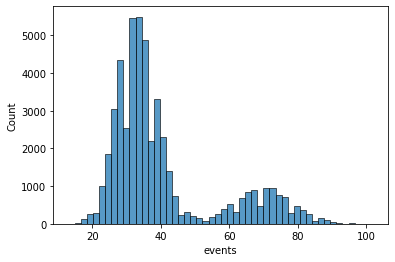

In [40]:
sns.histplot(data = df_test, x='events', bins = 50)

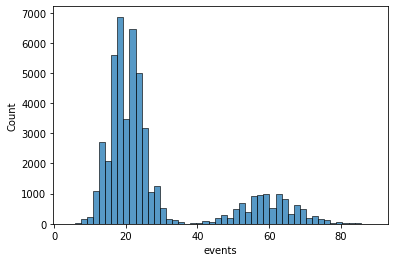

In [41]:
sns.histplot(data = df_control, x='events', bins = 50)

In [51]:
df_test = task_2.query("group == 'control'").groupby('segment').events.describe()

In [52]:
df_test

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
high,10000.0,59.970800,7.805347,31.0,55.0,60.0,65.0,89.0
low,40000.0,20.031575,4.473576,4.0,17.0,20.0,23.0,41.0


In [54]:
anova_sm = smf.ols("events ~ segment + group + segment:group", data = task_2).fit()

In [56]:
anova_lm(anova_sm, typ = 2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [57]:
task_2["combinations"] = task_2['group'] + ' \ ' + task_2['segment']

In [63]:
task_2_test_df = task_2.query("group == 'test'")
task_2_control_df = task_2.query("group == 'control'")

In [64]:
pairwise_tukeyhsd(task_2_test_df.events, task_2_test_df.segment).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-36.9126,0.001,-37.0517,-36.7734,True


In [65]:
pairwise_tukeyhsd(task_2_control_df.events, task_2_control_df.segment).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-39.9392,0.001,-40.0556,-39.8229,True
